In [30]:
import pandas as pd
import seaborn as sns
import warnings

In [31]:
warnings.filterwarnings('ignore')

# Membaca Dataset

In [32]:
df = pd.read_csv("exams.csv")

In [33]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,male,group C,high school,standard,none,73,70,65
996,male,group D,associate's degree,free/reduced,completed,85,91,92
997,female,group C,some high school,free/reduced,none,32,35,41
998,female,group C,some college,standard,none,73,74,82
999,male,group A,some college,standard,completed,65,60,62


# Data Scaling & Pembuatan Subset

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
df_subset = df[["math score", "writing score"]]

In [36]:
ss = StandardScaler()

In [37]:
x_scaled = ss.fit_transform(df_subset)

# K-Means

In [38]:
from sklearn.cluster import KMeans

In [39]:
model_kmeans = KMeans(n_clusters=3, random_state=0)

In [40]:
model_kmeans.fit(x_scaled)

KMeans(n_clusters=3, random_state=0)

In [41]:
labels = model_kmeans.labels_
print(labels)

[0 2 2 0 0 0 0 1 0 2 1 1 1 0 1 0 2 0 2 2 1 0 0 2 2 2 2 0 1 2 1 1 2 0 1 0 0
 0 0 1 0 0 1 0 1 2 0 0 0 0 0 0 1 2 2 0 1 1 2 0 0 0 0 1 1 0 0 2 0 0 0 2 0 1
 0 0 2 1 1 2 2 2 2 1 2 0 0 1 0 0 2 0 1 1 1 0 1 2 0 0 0 1 1 0 2 1 1 2 1 2 1
 2 0 2 1 1 0 0 0 1 0 1 0 2 1 0 0 2 1 1 1 0 0 0 2 0 1 0 2 0 0 1 1 0 1 2 0 2
 1 2 0 0 0 0 0 2 0 1 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 1 2 2 2 1 1 0 2 1 0 1
 1 0 0 0 2 2 2 0 1 0 2 2 2 0 0 0 2 0 0 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 0
 2 1 1 1 2 0 1 1 1 1 2 1 0 1 0 1 0 1 1 1 0 0 2 0 2 0 2 1 0 1 0 0 2 0 1 0 0
 1 0 2 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 1 2 0 1 1 0 2 2 1 1 2 0 0 1 1 0 0 2 1
 2 2 0 2 2 2 2 0 0 0 0 0 0 1 0 2 2 1 0 1 0 1 1 1 2 0 2 1 1 0 1 0 0 0 1 1 2
 1 2 0 2 2 0 1 0 2 0 0 1 0 1 0 2 1 0 2 1 0 0 2 0 0 0 2 1 2 0 1 0 0 0 0 0 0
 1 0 0 0 1 0 1 2 1 1 2 1 0 1 1 1 2 0 1 1 0 2 2 0 2 0 1 1 1 0 1 0 0 0 1 0 1
 0 2 0 0 0 0 0 0 0 0 0 0 2 0 0 2 1 2 1 0 1 2 1 1 1 0 1 0 1 0 2 1 0 0 1 0 2
 1 0 1 0 2 0 0 0 1 2 1 0 1 1 0 0 0 2 2 0 2 0 1 2 0 0 1 1 0 2 0 1 1 0 0 2 1
 1 1 1 1 1 0 0 1 0 1 0 2 

## Evaluasi KMeans Dengan Cross Tab

In [42]:
df_kmeans = pd.DataFrame({'Labels':labels, 'Race/Ethnicity':df["race/ethnicity"]})

ct1 = pd.crosstab(df_kmeans['Labels'], df_kmeans['Race/Ethnicity'])

In [43]:
print(ct1)

Race/Ethnicity  group A  group B  group C  group D  group E
Labels                                                     
0                    31       96      155      110       49
1                    28       58       78      116       63
2                    20       51       90       36       19


## Menampilkan Centroid Di Tiap Cluster

In [44]:
import matplotlib.pyplot as plt

In [45]:
xs = x_scaled[:, 0]
ys = x_scaled[:, 1]

In [46]:
centroids = model_kmeans.cluster_centers_
centroids_x = centroids[:, 0]
centroids_y = centroids[:, 1]

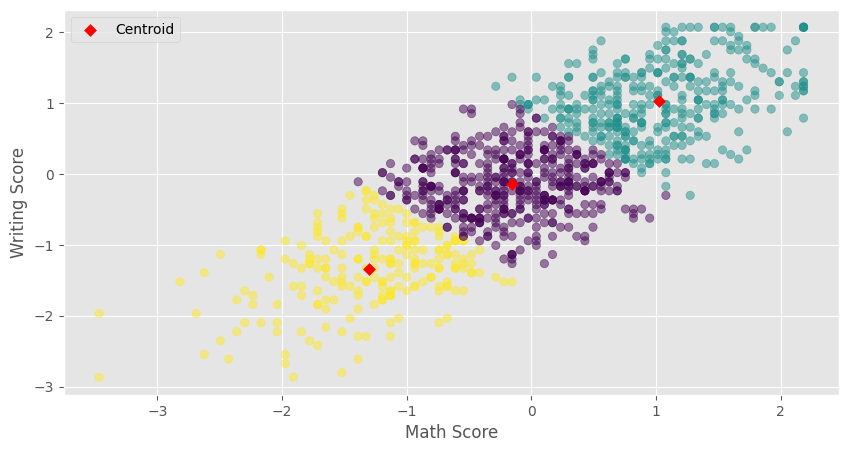

In [48]:
plt.style.use('ggplot')
plt.figure(figsize=(10,5))
plt.scatter(xs, ys, c = labels, alpha = 0.5)
plt.scatter(centroids_x, centroids_y,c = "red", marker = 'D', label = "Centroid")
plt.xlabel("Math Score")
plt.ylabel("Writing Score")
plt.legend()
plt.show()

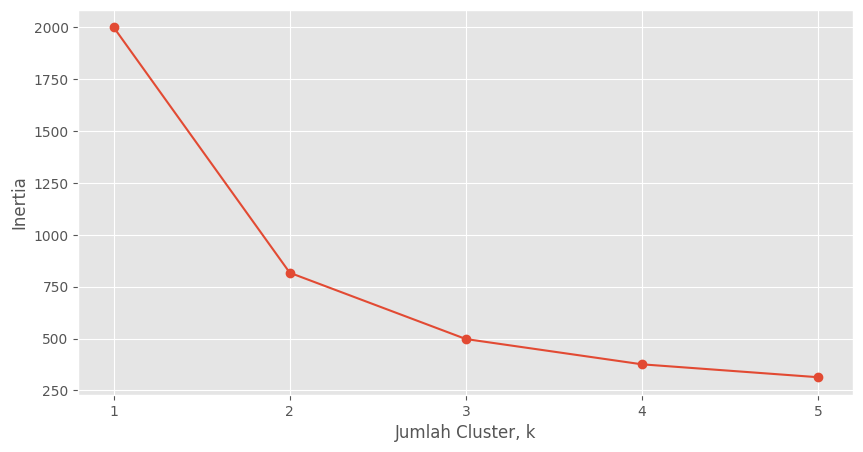

In [49]:
ks = range(1,6)
inertias = []
for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(x_scaled)
    inertias.append(model.inertia_)
# Plot ks vs inertias
plt.figure(figsize=(10,5))
plt.plot(ks, inertias, '-o')
plt.xlabel('Jumlah Cluster, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.show()